In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter

In [3]:
url = 'https://raw.githubusercontent.com/MaorBeker/Project/main/Data%20analys/employee_attrition_train%20(1).csv'
employee_df = pd.read_csv(url)

In [4]:
employee_df
temp_1 = employee_df
temp_1['Num'] = 1
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Num'],
      dtype='object')

<AxesSubplot:xlabel='MaritalStatus', ylabel='Percent'>

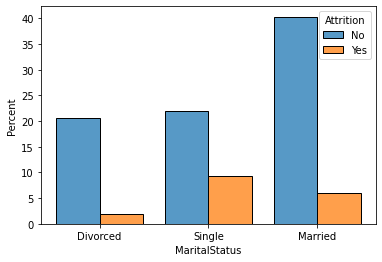

In [5]:
sns.histplot(data = employee_df, x = 'MaritalStatus', hue='Attrition', stat = 'percent', multiple = 'dodge', shrink = 0.8)

[Text(0.5, 1.0, 'Divorced')]

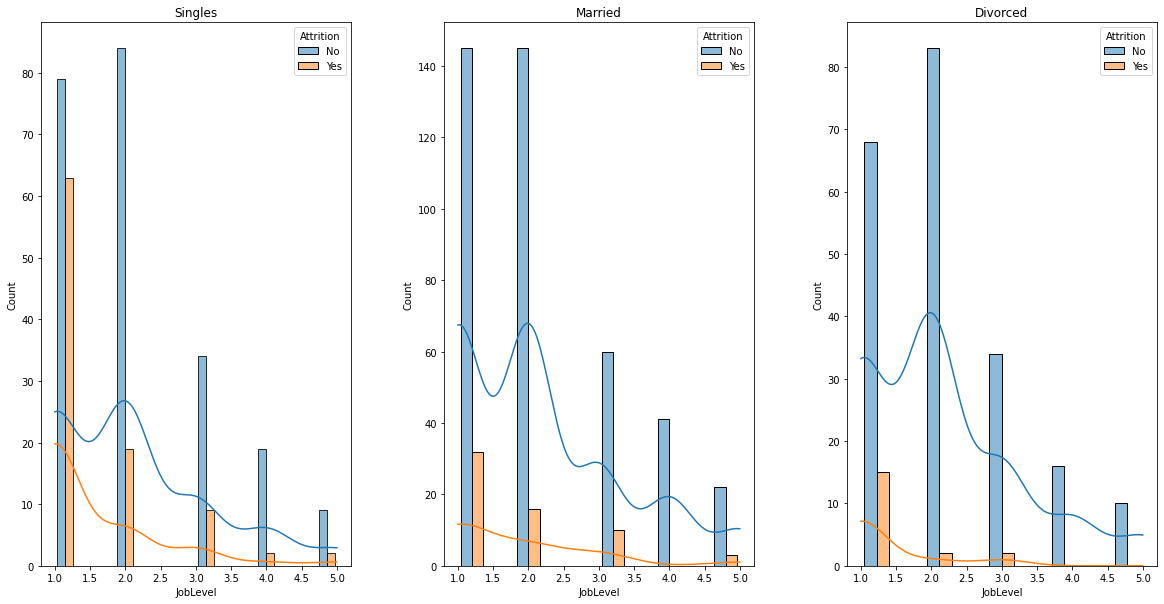

In [74]:
fig, ax = plt.subplots(ncols=3, figsize = (20,10))
plt.subplots_adjust(wspace = 0.3)
sns.histplot(data =employee_df[employee_df.MaritalStatus=="Single"], x = "JobLevel" ,hue = "Attrition", shrink=.8,ax=ax[0], stat = "count", multiple="dodge",hue_order = ['No','Yes'],kde = True).set(title = 'Singles')   
sns.histplot(data =employee_df[employee_df.MaritalStatus=="Married"], x = "JobLevel" ,hue = "Attrition", shrink=.8,ax=ax[1], stat = "count", multiple="dodge", kde = True).set(title = 'Married')   
sns.histplot(data =employee_df[employee_df.MaritalStatus=="Divorced"], x = "JobLevel" ,hue = "Attrition", shrink=.8,ax=ax[2], stat = "count", multiple="dodge", kde= True).set(title = 'Divorced')  

In [7]:
try1= employee_df.copy()
for index,row in employee_df.iterrows():
    if try1.loc[index,'Education']<3:
         try1.loc[index,"Phase"] = 'No Degree'
    else:
         try1.loc[index,'Phase'] = 'Bachelor or above'        

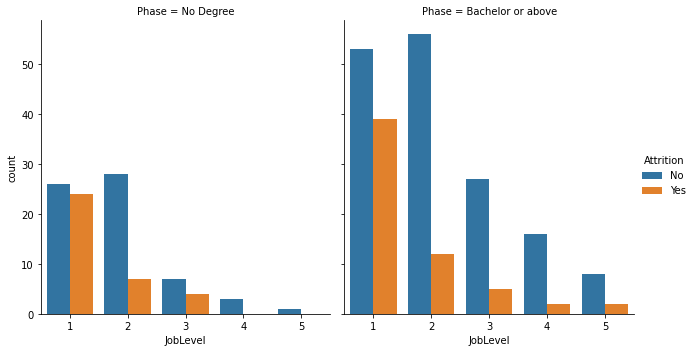

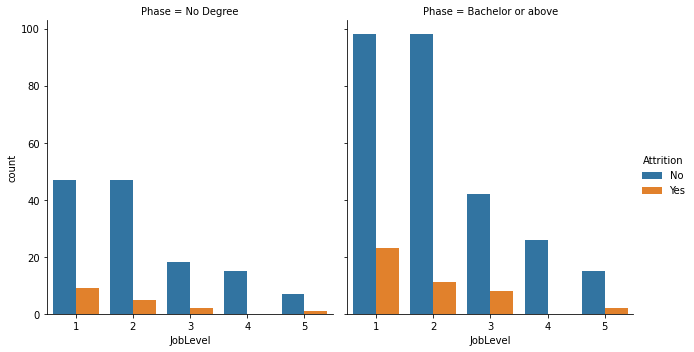

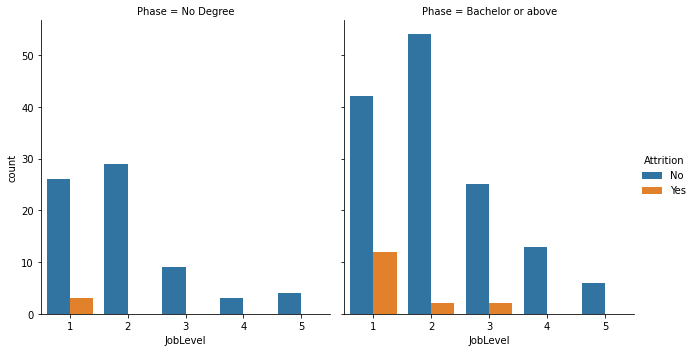

In [8]:
sin = try1
sin = sin.loc[(try1.MaritalStatus == 'Single')]
mar = try1
mar = mar.loc[(try1.MaritalStatus == 'Married')]
div = try1
div = div.loc[(try1.MaritalStatus == 'Divorced')]
sns.catplot(data = sin, x = 'JobLevel', hue = 'Attrition',kind ='count', aspect = .9, col = 'Phase', hue_order = ['No','Yes'])
sns.catplot(data = mar, x = 'JobLevel', hue = 'Attrition',kind ='count', aspect = .9, col = 'Phase', col_order = ['No Degree', 'Bachelor or above'])
sns.catplot(data = div, x = 'JobLevel', hue = 'Attrition',kind ='count', aspect = .9, col = 'Phase')

In [9]:
try2 = try1
#try2= try2.loc[(try1.Attrition == 'Yes')]
try3 = try1
try3 = try3.loc[(try1.Attrition == 'No')]
sin = try2
mar = try2
div = try2

[Text(0.5, 1.0, 'Divorced')]

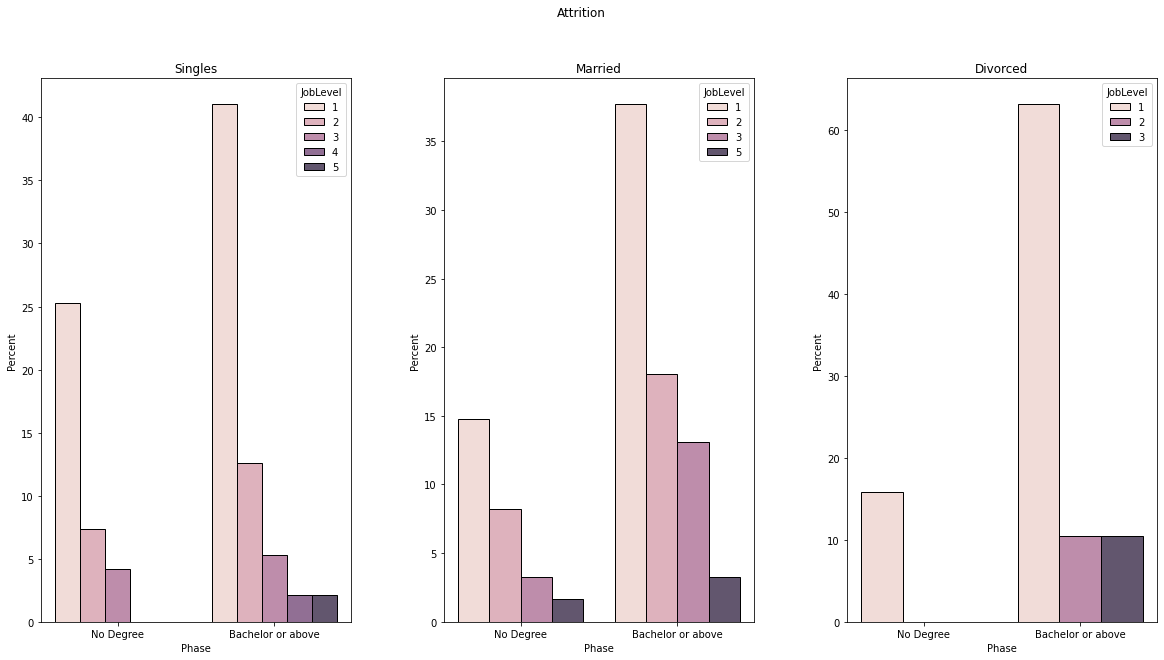

In [10]:
fig, ax = plt.subplots(ncols=3, figsize = (20,10))
fig.suptitle('Attrition')
plt.subplots_adjust(wspace = 0.3)
sns.histplot(data =sin[sin.MaritalStatus=="Single"], x = "Phase" ,hue = "JobLevel", shrink=.8,ax=ax[0], stat = "percent", multiple="dodge",hue_order = ['No','Yes']).set(title = 'Singles')   
sns.histplot(data =mar[mar.MaritalStatus=="Married"], x = 'Phase' ,hue = "JobLevel", shrink=.8,ax=ax[1], stat = "percent", multiple="dodge").set(title = 'Married')   
sns.histplot(data =div[div.MaritalStatus=="Divorced"], x = "Phase" ,hue = "JobLevel", shrink=.8,ax=ax[2], stat = "percent", multiple="dodge").set(title = 'Divorced')  


In [11]:
sin1 = try3
mar1 = try3
div1= try3

[Text(0.5, 1.0, 'Divorced')]

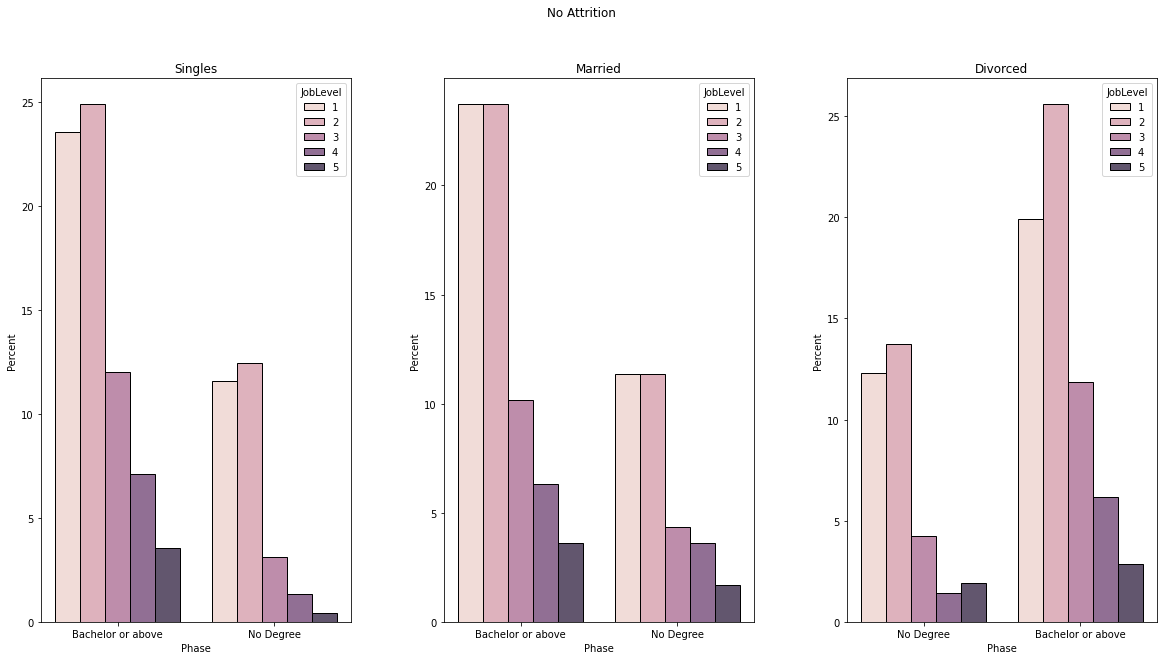

In [12]:
fig, ax = plt.subplots(ncols=3, figsize = (20,10))
fig.suptitle('No Attrition')
plt.subplots_adjust(wspace = 0.3)
sns.histplot(data =sin1[sin1.MaritalStatus=="Single"], x = "Phase" ,hue = "JobLevel", shrink=.8,ax=ax[0], stat = "percent", multiple="dodge").set(title = 'Singles')   
sns.histplot(data =mar1[mar1.MaritalStatus=="Married"], x = 'Phase' ,hue = "JobLevel", shrink=.8,ax=ax[1], stat = "percent", multiple="dodge").set(title = 'Married')   
sns.histplot(data =div1[div1.MaritalStatus=="Divorced"], x = "Phase" ,hue = "JobLevel", shrink=.8,ax=ax[2], stat = "percent", multiple="dodge").set(title = 'Divorced')  

In [13]:
try22 = try1
try22 = try22.loc[(try1.Attrition== 'Yes')]
try23 = try22.melt(id_vars = 'JobLevel', value_vars = 'Phase')
try23

,JobLevel,variable,value
0,1,Phase,No Degree
1,3,Phase,No Degree
2,1,Phase,Bachelor or above
3,1,Phase,Bachelor or above
4,3,Phase,Bachelor or above
...,...,...,...
171,1,Phase,Bachelor or above
172,1,Phase,No Degree
173,1,Phase,No Degree
174,3,Phase,Bachelor or above


In [19]:
piv = try22.copy()
piv1['JobLevelstr'] = piv1['JobLevel'].astype(str) 
piv2 = piv1.JobLevelstr.str.split(';' , n = 5 , expand = True)
piv2

,0
2,1
5,3
8,1
14,1
15,3
...,...
1007,1
1012,1
1014,1
1016,3


In [114]:
try100= employee_df.copy()
for index,row in employee_df.iterrows():
    if try100.loc[index,'Education']<3 :
         try100.loc[index,"Phase"] = 'No Degree'
    else:
         try100.loc[index,'Phase'] = 'Bachelor or above'

In [122]:
ma = try100.copy()
ma = ma.loc[(try100.JobLevel == 1)&(try100.Attrition == 'Yes')]


In [123]:
piv = pd.pivot_table(ma, index = ['Phase'], columns = ['JobLevel','Attrition'], values= ['Num'] , aggfunc = 'count')


array([<AxesSubplot:ylabel='(1, Yes)'>], dtype=object)

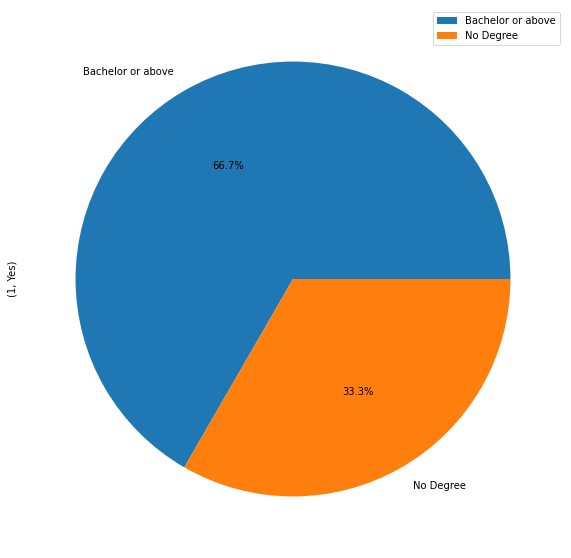

In [121]:
piv.groupby(['Phase']).sum().plot(kind = 'pie', subplots = True, figsize = (20,10), y = 'Num', autopct = '%1.1f%%')


In [118]:
ma1 = try100.copy()
#ma = ma[(ma['JobLevel'] != 4)&(ma['JobLevel'] != 5)]
ma1 = ma1.loc[(try100.Attrition == 'No')]

In [110]:
piv = pd.pivot_table(ma1, index = ['Phase'], columns = ['JobLevel'], values= ['Num'] , aggfunc = 'count')
piv

Num                 
JobLevel             1    2   3   4   5
Phase                                  
Bachelor or above  193  208  96  55  29
No Degree           99  105  34  21  13

array([<AxesSubplot:ylabel='1'>, <AxesSubplot:ylabel='2'>,
       <AxesSubplot:ylabel='3'>, <AxesSubplot:ylabel='4'>,
       <AxesSubplot:ylabel='5'>], dtype=object)

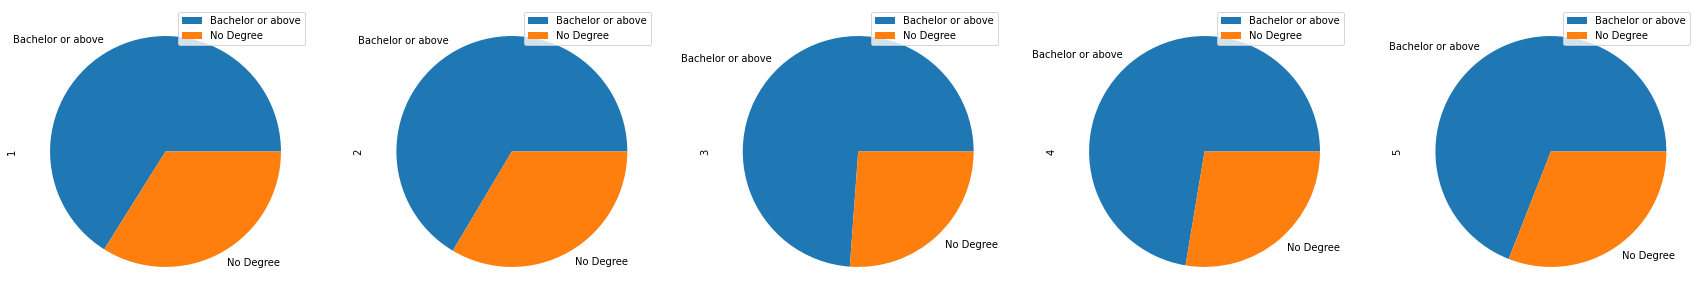

In [111]:
piv.groupby(['Phase']).mean().plot(kind = 'pie', subplots = True, figsize = (30,20), y = 'Num')


[Text(0.5, 1.0, 'Divorced')]

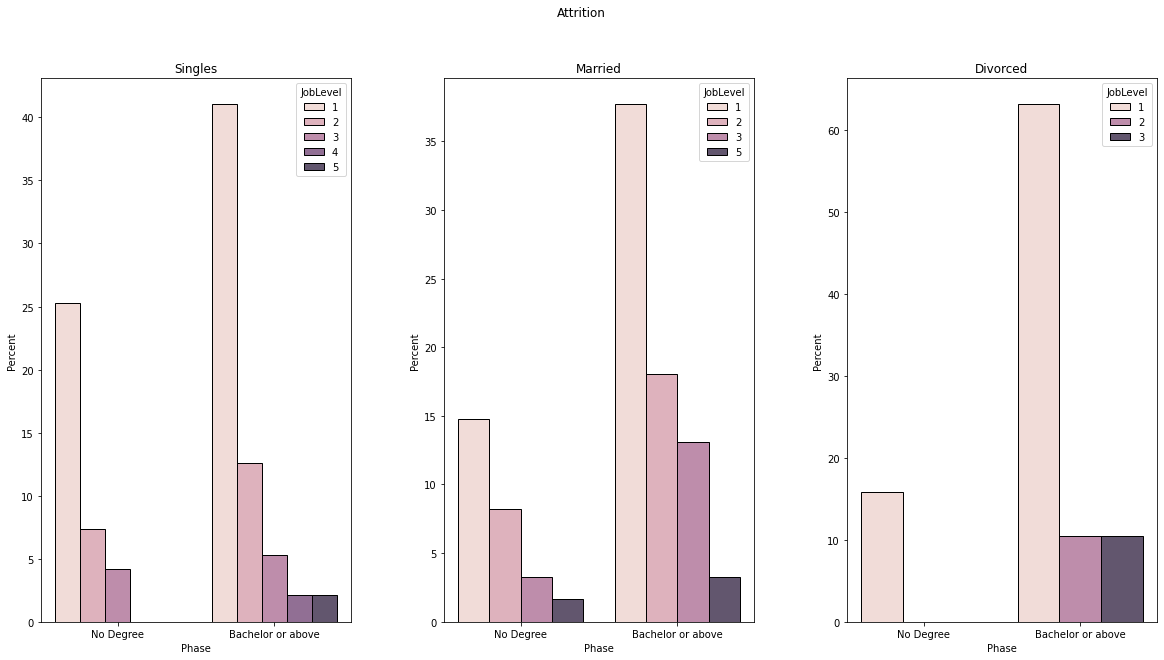

In [112]:
fig, ax = plt.subplots(ncols=3, figsize = (20,10))
fig.suptitle('Attrition')
plt.subplots_adjust(wspace = 0.3)
sns.histplot(data =sin[sin.MaritalStatus=="Single"], x = "Phase" ,hue = "JobLevel", shrink=.8,ax=ax[0], stat = "percent", multiple="dodge",hue_order = ['No','Yes']).set(title = 'Singles')   
sns.histplot(data =mar[mar.MaritalStatus=="Married"], x = 'Phase' ,hue = "JobLevel", shrink=.8,ax=ax[1], stat = "percent", multiple="dodge").set(title = 'Married')   
sns.histplot(data =div[div.MaritalStatus=="Divorced"], x = "Phase" ,hue = "JobLevel", shrink=.8,ax=ax[2], stat = "percent", multiple="dodge").set(title = 'Divorced')  
